## Tutorial Pytorch

<img src="figs/fig-pytorch.png" width="30%">

[https://pytorch.org](https://pytorch.org)

### - **PyTorch** es una biblioteca de aprendizaje automático de código abierto desarrollada por Meta AI.
###  - **Tensores**: Principal bloque de construcción (arreglos multi-dimensionales, no estrictamente el mismo significado que en matemáticas), similar a NumPy, con soporte para GPUs.
###  - **Autograd**: Sistema de diferenciación automática para el cálculo de los gradientes y facilitar el entrenamiento de modelos.
###  - **Ecosistema**: Incluye bibliotecas para visión por computadora, procesamiento de lenguaje natural y audio.

###

## Instalación 

###  <span style="color:cyan"> Windows </span>

```bash
conda install pytorch torchvision torchaudio cpuonly -c pytorch
```
##### CUDA - Compute Unified Device Architecture (https://developer.nvidia.com/cuda-toolkit)

```bash
conda install pytorch torchvision torchaudio pytorch-cuda=12.4 -c pytorch -c nvidia

```


### PIP

```bash
pip install torch torchvision torchaudio
```

##### CUDA - Compute Unified Device Architecture (https://developer.nvidia.com/cuda-toolkit)

```bash
pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

```




###  <span style="color:cyan">  Mac OS </span>

### Anaconda

```bash
conda install pytorch torchvision -c pytorch
```

### PIP

```bash
pip install torch torchvision
```


### Verificación de la instalación

In [1]:
import torch
torch.__version__

'2.9.0+cpu'

In [2]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.6905, 0.0825, 0.4227],
        [0.4933, 0.9674, 0.9606],
        [0.2911, 0.5217, 0.3959],
        [0.7494, 0.5327, 0.1483],
        [0.7991, 0.2053, 0.2508]])


## Paquete: torch
[https://pytorch.org/docs/stable/torch.html](https://pytorch.org/docs/stable/torch.html)

- ### El paquete Torch contiene estructuras de datos para tensores multidimensionales y define operaciones matemáticas sobre estos tensores
- ### Tiene una contraparte CUDA, que le permite ejecutar sus cálculos de tensores en una GPU NVIDIA.


## Introducción a los tensores

###  Tensores

- #### Los tensores son una estructura de datos similar a las matrices y arreglos.
 - #### En PyTorch, se usan tensores para codificar las entradas y salidas de un modelo, así como los parámetros del modelo.

- #### Los tensores son similares a los ndarrays de NumPy, excepto que los tensores pueden ejecutarse en GPU u otros aceleradores de hardware.

 - ####  Los tensores están optimizados para la diferenciación automática (Autograd).

 - #### Su función es representar los datos de forma numérica


In [3]:
import torch
# Creación de un tensor desde datos
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(x_data)


tensor([[1, 2],
        [3, 4]])


In [4]:
import numpy as np
# A partir de una matriz NumPy
# Se pueden crear tensores a partir de matrices NumPy (y viceversa).

np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(x_np)

tensor([[1, 2],
        [3, 4]])


In [5]:
# El nuevo tensor conserva las propiedades (forma, tipo de datos) del tensor del argumento

x_ones = torch.ones_like(x_data) # conserva las propiedades de x_data
print(f"Tensor de unos: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float32) # anula el tipo de datos de x_data
print(f"Tensor aleatorio: \n {x_rand} \n")

Tensor de unos: 
 tensor([[1, 1],
        [1, 1]]) 

Tensor aleatorio: 
 tensor([[0.6877, 0.5824],
        [0.8743, 0.5034]]) 



In [6]:
shape = (2,3)
# random
rand_tensor = torch.rand(shape)
# unos
ones_tensor = torch.ones(shape)
# ceros
zeros_tensor = torch.zeros(shape)

print(f"Tensor aleatorio: \n {rand_tensor} \n")
print(f"Tensor de unos: \n {ones_tensor} \n")
print(f"Tensor de ceros: \n {zeros_tensor}")


Tensor aleatorio: 
 tensor([[0.2784, 0.6641, 0.2595],
        [0.9971, 0.6932, 0.7682]]) 

Tensor de unos: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Tensor de ceros: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Atributos del tensor

In [8]:
tensor = torch.rand(3,4)

print(f"Forma del tensor: {tensor.shape}")
print(f"Tipo de datos del tensor: {tensor.dtype}")
print(f"El tensor del dispositivo se almacena en: {tensor.device}")

Forma del tensor: torch.Size([3, 4])
Tipo de datos del tensor: torch.float32
El tensor del dispositivo se almacena en: cpu


# Operaciones con tensores

### Creando tensores en GPU

In [9]:
# Movemos nuestro tensor a la GPU si está disponible
print("GPU disponible: ", torch.cuda.is_available())

# Por default los tensores se crean en el cpu
tensor  = torch.rand((3,4))
print("tensor en: ", tensor.device)


GPU disponible:  False
tensor en:  cpu


In [12]:

if torch.cuda.is_available():  # GPU
    print("Moviendo tensor a GPU: ", torch.cuda.is_available())
    tensor = tensor.to("cuda")
    tensor2 = torch.rand((3,4), device="cuda")
    print("Creando tensor2 en GPU: ", tensor2)

if torch.backends.mps.is_available():  #GPU en MAC
    print("Moviendo tensor a GPU Mac: ", torch.backends.mps.is_available())
    tensor = tensor.to("mps")
    tensor2 = torch.rand((3,4), device="mps")
    print("Creando tensor2 en GPU Mac: ", tensor2)

print(tensor)


tensor([[0.9965, 0.1139, 0.8702, 0.0402],
        [0.9504, 0.7145, 0.8949, 0.9080],
        [0.3786, 0.2539, 0.6152, 0.4094]])


## Indexamiento y slicing

In [15]:
#Indexación y segmentación estándar de tipo numpy:

tensor = torch.linspace(1, 16, 16).reshape(4,4)
print(tensor)
print(f"Primera fila: {tensor[0]}")
print(f"Primera columna: {tensor[:, 0]}")
print(f"Última columna: {tensor[:, -1]}")
# colocar ceros a la columna 1 
tensor[:, 1] = 0
print(tensor)

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.]])
Primera fila: tensor([1., 2., 3., 4.])
Primera columna: tensor([ 1.,  5.,  9., 13.])
Última columna: tensor([ 4.,  8., 12., 16.])
tensor([[ 1.,  0.,  3.,  4.],
        [ 5.,  0.,  7.,  8.],
        [ 9.,  0., 11., 12.],
        [13.,  0., 15., 16.]])


## Operaciones aritméticas

In [17]:
# Esto calcula la multiplicación de matrices entre dos tensores. y1, y2, y3 tendrán el mismo valor
# ``tensor.T`` devuelve la transpuesta de un tensor

tensor = torch.linspace(1, 6, 6).reshape(2,3)

print(tensor)
y1 = tensor @ tensor.T # operador @ para multiplicación de matrices
print(f"y1:\n{y1}\n")
y2 = tensor.matmul(tensor.T) # función matmul para multiplicación de matrices equivalente que @
print(f"y2:\n{y2}\n")

y3 = torch.rand_like(y1) 
print(f"y3:\n{y3}\n")

# Esto calcula el producto elemento por elemento. z1, z2, z3 tendrán el mismo valor
z1 = tensor * tensor # operador * para multiplicación elemento por elemento
print(f"z1:\n{z1}\n")

z2 = tensor.mul(tensor) # función mul para multiplicación elemento por elemento equivalente que *
print(f"z2:\n{z2}\n")


tensor([[1., 2., 3.],
        [4., 5., 6.]])
y1:
tensor([[14., 32.],
        [32., 77.]])

y2:
tensor([[14., 32.],
        [32., 77.]])

y3:
tensor([[0.2496, 0.1938],
        [0.3306, 0.5181]])

z1:
tensor([[ 1.,  4.,  9.],
        [16., 25., 36.]])

z2:
tensor([[ 1.,  4.,  9.],
        [16., 25., 36.]])



## Ejemplo de imagen
- ### Por ejemplo, se podría representar una imagen como un tensor con forma [3, 200, 200]
- ### lo que significaría [canales_de_color, altura, ancho], dado que la imagen tiene 3 canales de color (red, green, blue), una altura de 200 píxeles y un ancho de 200 píxeles.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.1063647..4.610979].


torch.Size([3, 200, 200])


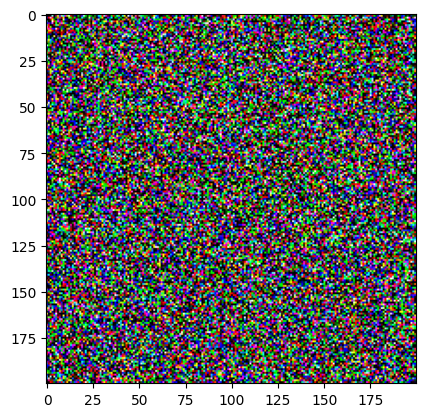

In [18]:
import torch.nn as nn
import matplotlib.pyplot as plt

tensor_image = torch.randn((3, 200, 200) , dtype=torch.float32)
print(tensor_image.shape)
#nn.init.xavier_uniform_(tensor_image, gain=18)

#Crea un nuevo vector con los mismo datos, con diferente forma (shape)  forma para visualizar 200x200x3
tensor = tensor_image.view(tensor_image.shape[1], tensor_image.shape[2], tensor_image.shape[0]) #tensor = tensor_image.permute(1, 2, 0)
plt.imshow(tensor) 



## Creación de capas lineales

In [19]:
# Capa lineal
import torch
import numpy as np
from torch import nn

#Estable la semilla para la generación de números aleatorios para la reproducibilidad de experimentos

np.random.seed(42) #establece la semilla para numpy
torch.manual_seed(42)# establece la semilla para CPU

#creación de la capa lineal de 3x2: 3 entradas y 2 neuronas de salida
linear_layer = nn.Linear(in_features=3,out_features=2)

# parámetro donde se guardan los pesos
print("weight:", linear_layer.weight)

# El bias se crea automáticamente de acuerdo al números de neuronas
print("bias:", linear_layer.bias)

weight: Parameter containing:
tensor([[ 0.4414,  0.4792, -0.1353],
        [ 0.5304, -0.1265,  0.1165]], requires_grad=True)
bias: Parameter containing:
tensor([-0.2811,  0.3391], requires_grad=True)


## Introducción de datos a la capa

In [20]:
# definición de entradas

x = torch.tensor([1, 2, 3], dtype=torch.float32)#lo que hacemos aqui es crear un tensor de 1 fila y 3 columnas

#Aplicación de la capa lineal en Pytorch
z_c1 = linear_layer(x)
print("z_c1:", z_c1)


print("\n\nCáluclo manual de z para las entradas de x:")
print("inputs:", x)
print("z11 : ", 0.4414*1 + 0.4792*2 -0.1353*3 + (-0.2811) )
print("z12 : ", 0.5304*1 -0.1265*2 + 0.1165*3 + (0.3391) )

torch.matmul(x, linear_layer.weight.T) + linear_layer.bias

z_c1: tensor([0.7130, 0.9659], grad_fn=<ViewBackward0>)


Cáluclo manual de z para las entradas de x:
inputs: tensor([1., 2., 3.])
z11 :  0.7127999999999999
z12 :  0.966


tensor([0.7130, 0.9659], grad_fn=<AddBackward0>)

## Aplicación de funciones de activación

In [21]:
#Funcion de activación Sigmoide
sigmoid = nn.Sigmoid()
z = torch.tensor([5, 0, -5], dtype=torch.float32) #torch tensor sirve para crear tensores a partir de listas o arrays
a = sigmoid(z)
print(a)

tensor([0.9933, 0.5000, 0.0067])


In [22]:
#Funcion de activación ReLU
relu = nn.ReLU()

z = torch.tensor([5, 0, -5], dtype=torch.float32)
a = relu(z)
print(a)

tensor([5., 0., 0.])


In [23]:
#Funcion de activación ELU
elu = nn.ELU()

z = torch.tensor([5, 0, -5], dtype=torch.float32)
a = elu(z)
print(a)

tensor([ 5.0000,  0.0000, -0.9933])


In [24]:
#Funcion de activación PReLU
prelu = nn.PReLU()

z = torch.tensor([5, 0, -5], dtype=torch.float32)
a = prelu(z)
print(a)

tensor([ 5.0000,  0.0000, -1.2500], grad_fn=<PreluKernelBackward0>)


## Cálculo de Gradientes: AutoGrad

### Torch.autograd proporciona clases y funciones que implementan la diferenciación automática de funciones con valores escalares arbitrarios.

### Requiere declarar los tensores para los que se deben calcular los gradientes con la palabra clave **require_grad=True**.

### **backward**  Calcular la suma de gradientes de tensores dados con respecto a las hojas del gráfico generado.

### **grad**  Compute and return the sum of gradients of outputs with respect to the inputs.

#### A continuación se muestra una representación visual del grado (DAG) del ejemplo siguiente. En el gráfico, las flechas apuntan en la dirección del paso hacia adelante. Los nodos representan las funciones hacia atrás de cada operación en el paso hacia adelante. Los nodos de hoja en azul representan  tensores de hojas a y b.

$$ Q=3a^3 - b^2 $$

$$ \frac {\partial Q}{\partial a} =9a^2 $$ 
$$ \frac {\partial Q}{\partial b} = - 2b $$
<img src="figs/fig-dag_autograd.png" width="20%">


Cuando se llama a **.backward()** en Q, autograd calcula estos gradientes y los almacena en el atributo **.grad** de los tensores respectivos.

Se requiere pasar explícitamente un argumento **gradient** en **Q.backward()** porque es un vector. **gradient** es un tensor de la misma forma que Q y representa el gradiente de Q con respecto a sí mismo, es decir,




In [27]:
import torch

# Tensores que requieren el cálculo de los gradientes

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)c = torch.tensor([0.,0.], requires_grad=True)

# Funcion Q = a^3 - b^2

Q = a**3 - b**2

# Derivada de Q = 3a^2 - 2b
# Derivada de Q respecto a 'a'  Qa = 3a^2 
# Derivada de Q respecto a 'b'  Qb = -2b

# Cálculo de los gradientes
# Se requiere como parámetro el tamaño de las dimensiones del vector o matriz que se calcularán los gradientes
print(torch.ones_like(b))
Q.backward(gradient=torch.ones_like(b))

print("Pytorch gradiente de a:",  a.grad)
print("Pytorch gradiente de b:",  b.grad)
print(Q.grad_fn)


# Comparación de los gradientes
print("")
print("Gradientes calculados con las derivadas parciales")
print("Gradiente respecto a 'a' :",  3*a**2)
print("Gradiente respecto a 'b' :",  -2*b)
#


tensor([1., 1.])
Pytorch gradiente de a: tensor([12., 27.])
Pytorch gradiente de b: tensor([-12.,  -8.])

Gradientes calculados con las derivadas parciales
Gradiente respecto a 'a' : tensor([12., 27.], grad_fn=<MulBackward0>)
Gradiente respecto a 'b' : tensor([-12.,  -8.], grad_fn=<MulBackward0>)


### Gradiente de la función sigmoide

### $\sigma(x) = \frac{1}{1 + e^{-x}}$

### Derivada de la función sigmoide

### $\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))$

In [28]:
#Gradientes de la función de sigmoide
sigmoid = nn.Sigmoid()

z = torch.tensor([5, 0, -5], dtype=torch.float32, requires_grad=True)

a = sigmoid(z)
print("activaciones:", a)

a.backward(torch.ones_like(z))

print("Gradientes:", z.grad)

# Derivada símbolica de la función y=sigmoide(z): y*(1-y)
print("\nGradientes manuales")

print(a[0]*(1-a[0]))

print("\n", a*(1-a))

activaciones: tensor([0.9933, 0.5000, 0.0067], grad_fn=<SigmoidBackward0>)
Gradientes: tensor([0.0066, 0.2500, 0.0066])

Gradientes manuales
tensor(0.0066, grad_fn=<MulBackward0>)

 tensor([0.0066, 0.2500, 0.0066], grad_fn=<MulBackward0>)


In [29]:
#Gradientes de la función de activación ReLu
relu = nn.ReLU()

z = torch.tensor([5, 0, -5], dtype=torch.float32, requires_grad=True)
a = relu(z)

a.backward(torch.ones_like(z))

print(a)
print("Gradientes:", z.grad)


tensor([5., 0., 0.], grad_fn=<ReluBackward0>)
Gradientes: tensor([1., 0., 0.])


## Ejercicio de gradientes  1
### Obtener los gradientes de la función f(x,y) respecto a los tensores $x$ y $y$ 
### $f(x, y) = x^2  y + \sin(x + y) $

### 1. Definir los tensores $x$=2.0 y $y$=3.0
### 2. Usar las funciones torch.sin(z) y torch.cos(z)


In [42]:
 
## Ejercicio de gradientes  1
### Obtener los gradientes de la función f(x,y) respecto a los tensores $x$ y $y$ 
### $f(x, y) = x^2  y + \sin(x + y) $

### 1. Definir los tensores $x$=2.0 y $y$=3.0
### 2. Usar las funciones torch.sin(z) y torch.cos(z)
# 1. Definir los tensores y calcular los gradientes de los tensores x y y con la función anterior
import math
# Tensores que requieren el cálculo de los gradientes
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)
# Función f(x, y) = x^2 * y + sin(x + y)
f = x**2 * y + torch.sin(x + y)
# Cálculo de los gradientes
f.backward()
print("Pytorch gradiente de x:", x.grad)
print("Pytorch gradiente de y:", y.grad)
# 2. Comprobar manualmente que los gradientes  son los mismos obtenidos con el mecanismo de backward
# Derivada parcial de f respecto a x: df/dx = 2xy + cos(x + y)
df_dx = 2 * x.item() * y.item() + math.cos(x.item() + y.item())
print("Gradiente manual de x:", df_dx)
# Derivada parcial de f respecto a y: df/dy = x^2 + cos(x + y)
df_dy = x.item()**2 + math.cos(x.item() + y.item())
print("Gradiente manual de y:", df_dy)




Pytorch gradiente de x: tensor(12.2837)
Pytorch gradiente de y: tensor(4.2837)
Gradiente manual de x: 12.283662185463227
Gradiente manual de y: 4.283662185463227


## Ejercicio de gradientes 2

In [32]:
import numpy as np
# Función de activación sigmoide
def fn_sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada de la sigmoide
def fn_sigmoid_derivative(x):
    # return sigmoid(x) * (1 - sigmoid(x))
    return x * (1 - x)


In [39]:
# TODO: Dado el siguiente tensor t apicar una función aplicar dos veces una función sigmoide a t es decir y = sigmoide(sigmoide(t)), en pasos separados, 
# es decir con variables intermedias para aplicar la  regla de la cadena
# 1. Obtener el gradiente de t por medio de la librería PyTorch (backward)
# 2. Comprobar que el gradiente de t es el mismo obtenido de manera símbolica derivando la función sigmoide y aplicando la regla de la cadena, esto es,  dy_dt
# Nota1:  Para comprobar el gradiente de manera manual, hacer uso de las funciones fn_sigmoide y fn_sigmoid_derivative
# Nota2:  El cálculo de la derivada con la fn_sigmoid_derivative considera la entrada como el parámetro x ya activado, es decir,  x = sigmoide(t)
#         Si quiere aplicar el valor de entrada t en la dereivada use la linea comentada sigmoid(x) * (1 - sigmoid(x))

# Definición del tensor t
t = torch.tensor([0.8762], requires_grad=True)

# Aplicación de la función sigmoide dos veces
sigmoid = nn.Sigmoid()
s1 = sigmoid(t)   # primera aplicación
s2 = sigmoid(s1)  # segunda aplicación

# Cálculo del gradiente con PyTorch
s2.backward()
print("Gradiente calculado con PyTorch:", t.grad.item())

# ===========================================
# Cálculo del gradiente manual (regla de la cadena)
# ===========================================

# Convertimos a float normales
t_val = t.item() #.item() convierte un tensor de un solo valor a un float normal
s1_val = fn_sigmoid(t_val)  # misma salida que s1
s2_val = fn_sigmoid(s1_val) # misma salida que s2

# Derivadas usando valores activados
dy_ds1 = fn_sigmoid_derivative(s1_val)
ds1_dt = fn_sigmoid_derivative(fn_sigmoid(t_val))
dy_dt = dy_ds1 * ds1_dt

print("Gradiente calculado manualmente:", dy_dt)




Gradiente calculado con PyTorch: 0.045922815799713135
Gradiente calculado manualmente: 0.04307697243789041
